# Case Study: Spam Email Detection

<img src="https://github.com/josefftan/projects/blob/master/assets/img/portfolio/spam.png?raw=true" width="500" height="250" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-Spam-Email-Detection" data-toc-modified-id="Case-Study:-Spam-Email-Detection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: Spam Email Detection</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-and-Libraries-Importation" data-toc-modified-id="Data-and-Libraries-Importation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data and Libraries Importation</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Model-Creation" data-toc-modified-id="Model-Creation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Creation</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

Spam emails may be very irritable whenever you check your email inbox. luckily, there's a solution for that and big companies are using this to help their users to filter their inboxes such as Gmail and Outlock , with the help of machine learning specifically Naive Bayes Classifier it can easily predict if the messages are spam or ham.

**Problem:**
 - Predict if the messages are spam or ham (Legitimate)

**Dataset:**
 - The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham or spam.

 - The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.
 
**Source:** Kaggle Competition

# Data and Libraries Importation

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
# Import data
spam_df = pd.read_csv('project_data/emails.csv')

# Data Exploration

In [11]:
# show dataframe
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [75]:
# Check text
spam_df['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [8]:
# Describe dataset
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
# More info
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# Data Visualization

In [13]:
# Check ham data
ham = spam_df[ spam_df['spam'] == 0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [14]:
# Check ham data
spam = spam_df[ spam_df['spam'] == 1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [15]:
# Check spam percentage
print('spam percentage:', (len(spam) / len(spam_df))*100, '%')

spam percentage: 23.88268156424581 %


In [16]:
# Check ham percentage
print('spam percentage:', (len(ham) / len(spam_df))*100, '%')

spam percentage: 76.11731843575419 %


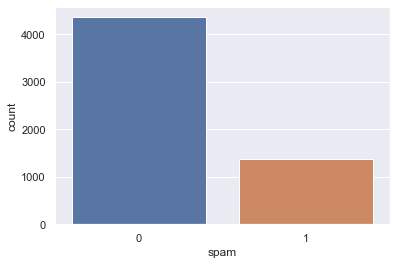

In [21]:
# Create countplot for spam and ham dataset
sns.countplot(spam_df['spam'], label = 'Spam vs Ham')
plt.show()

# Data Preprocessing

In [42]:
# Import library
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
# Transform words into numbers by CountVectorizer
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [44]:
# Get feature names
vectorizer.get_feature_names();

In [45]:
# Check in array format
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [46]:
# Check dimension
spamham_countvectorizer.shape

(5728, 37303)

# Model Creation

In [47]:
# Import library
from sklearn.naive_bayes import MultinomialNB

In [48]:
# Create labels
label = spam_df['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [49]:
# Fit the model
NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [55]:
# Create a testing sample
sample = ['free money!!!!', 'Hi joseff, why are you so handsome?', "thanks for the pizza"]
sample

['free money!!!!',
 'Hi joseff, why are you so handsome?',
 'thanks for the pizza']

In [56]:
# test the sample # Not handsome :(
sample_countvectorizer = vectorizer.transform(sample)
test_predict = NB_classifier.predict(sample_countvectorizer)
test_predict

array([1, 1, 0], dtype=int64)

---

In [58]:
# Create labels
X = spamham_countvectorizer
y = label

# Check dimension
X.shape, y.shape

((5728, 37303), (5728,))

In [59]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [60]:
# Fit the model
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# Model Evaluation

In [62]:
# Import libraries
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
# Initiate prediction for training data
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

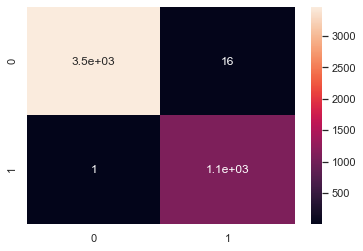

In [65]:
# Visualize confusion matrix for training data
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)
plt.show()

In [66]:
# Initiate prediction for testing data
y_predict_test = NB_classifier.predict(X_test)
y_predict_test

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

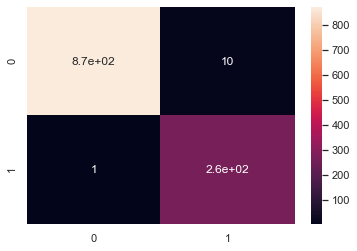

In [69]:
# Visualize confusion matrix for testing data
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)
plt.show()

In [70]:
# Classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       882
           1       0.96      1.00      0.98       264

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



# Conclusion

The model (Naive Bayes Classifier) were able to achieved 99% accuracy. This can be deploy to the production to easily filter out the spam messages from the legitimate messgaes to increase user's satisfaction.